In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib
from scipy.stats import kstest

In [2]:
data = pd.read_csv('bam_file_ks_test.csv')
data

,iteration,j_delta_1,j_delta_2,j_delta_3,j_delta_4,j_delta_5,j_delta_6,j_delta_7,j_delta_8,j_delta_9,...,f_delta_90,f_delta_91,f_delta_92,f_delta_93,f_delta_94,f_delta_95,f_delta_96,f_delta_97,f_delta_98,f_delta_99
0,0,1.052985,1.109551,1.173929,1.230289,1.316686,1.399431,1.475278,1.567012,1.660828,...,1.317670,1.295199,1.234108,1.153066,1.182574,1.122880,1.139978,1.139037,1.168765,1.176795
1,1,1.086072,1.166197,1.254187,1.328625,1.407161,1.511035,1.592998,1.684309,1.797231,...,1.392028,1.385176,1.380616,1.372935,1.384973,1.381553,1.385443,1.469734,1.519932,1.528352
2,2,1.082091,1.146371,1.229551,1.290528,1.362856,1.472153,1.568693,1.665512,1.753589,...,2.536253,2.552917,2.558076,2.567731,2.626510,2.795661,2.695236,2.666305,2.658363,2.665299
3,3,1.059488,1.133011,1.191922,1.242856,1.305949,1.373659,1.442116,1.506207,1.560275,...,1.143620,1.145631,1.133140,1.139289,1.129779,1.138496,1.144331,1.166351,1.241476,1.305900
4,4,1.109949,1.228666,1.339024,1.438700,1.591504,1.705552,1.811426,1.919150,2.041683,...,0.063963,0.061970,0.048670,0.044553,0.041976,0.039501,0.036546,0.034994,0.034075,0.033006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,1.097366,1.177029,1.252072,1.315447,1.379608,1.436293,1.513463,1.596815,1.699746,...,84.279579,84.595061,87.235761,88.117311,76.850619,78.804489,78.405496,78.269407,77.956154,77.330766
996,996,1.114567,1.227779,1.300520,1.406561,1.472300,1.541569,1.654615,1.769996,1.881930,...,4.795760,3.642992,3.474132,2.636375,2.386751,2.246720,2.112310,1.937023,1.921677,1.928267
997,997,1.075138,1.149187,1.224914,1.291338,1.370684,1.436778,1.510831,1.583461,1.687918,...,12.514770,12.512755,12.376418,12.310819,9.999057,9.424700,9.148416,8.059502,7.869058,7.164513
998,998,1.071421,1.150898,1.216598,1.294597,1.378710,1.471720,1.556748,1.638111,1.743029,...,7.786735,7.873511,7.736320,7.791475,7.925779,7.934422,7.926587,7.874573,7.816002,7.763582


In [3]:
j_data = data[['j_delta_' + str(i) for i in range(10, 100, 10)]].copy()
j_data.columns = [str(i) for i in range(10, 100,10)]
j_data = j_data.melt(value_vars = [str(i) for i in range(10, 100, 10)])
j_data.columns = ['n', 'value']
j_data["type"] = ["Isoform Junctions"] * 9000
j_data



,n,value,type
0,10,1.762908,Isoform Junctions
1,10,1.917950,Isoform Junctions
2,10,1.845630,Isoform Junctions
3,10,1.639248,Isoform Junctions
4,10,2.147648,Isoform Junctions
...,...,...,...
8995,90,8.214742,Isoform Junctions
8996,90,8.023308,Isoform Junctions
8997,90,1.729614,Isoform Junctions
8998,90,10.224503,Isoform Junctions


In [4]:
f_data = data[['f_delta_' + str(i) for i in range(10, 100, 10)]].copy()
f_data.columns = [str(i) for i in range(10, 100,10)]

f_data = f_data.melt(value_vars = [str(i) for i in range(10, 100, 10)])
f_data.columns = ['n', 'value']
f_data["type"] = ["Random Positions"] * 9000
f_data

,n,value,type
0,10,1.251924,Random Positions
1,10,1.970828,Random Positions
2,10,0.395014,Random Positions
3,10,0.086951,Random Positions
4,10,0.224649,Random Positions
...,...,...,...
8995,90,84.279579,Random Positions
8996,90,4.795760,Random Positions
8997,90,12.514770,Random Positions
8998,90,7.786735,Random Positions


In [5]:
data = pd.concat([f_data, j_data])
data['value'] = np.log(data['value'])
data

,n,value,type
0,10,0.224681,Random Positions
1,10,0.678454,Random Positions
2,10,-0.928835,Random Positions
3,10,-2.442414,Random Positions
4,10,-1.493218,Random Positions
...,...,...,...
8995,90,2.105930,Isoform Junctions
8996,90,2.082351,Isoform Junctions
8997,90,0.547898,Isoform Junctions
8998,90,2.324787,Isoform Junctions


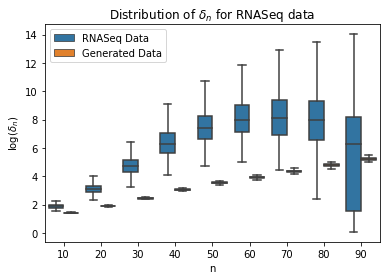

In [20]:
fig, ax = plt.subplots()

g = sns.boxplot(x='n', y='value', hue='type', data=data, showfliers=False)
ax.set_title(r"Distribution of $\delta_n$ for RNASeq data")
ax.set_ylabel(r"$\log(\delta_n)$")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='upper left')

plt.show()


In [6]:
save = False
if save:
    matplotlib.use("pgf")
    matplotlib.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'text.usetex': True,
        'pgf.rcfonts': False,
    })
    
    plt.savefig("rna_data_delta_n.pgf")

In [8]:
data = pd.read_csv('bam_file_ks_test.csv')


In [9]:
data['j_delta_1']
data['f_delta_1']


0       1.031817
1       1.481214
2       0.901907
3       0.608886
4       0.930436
         ...    
995     1.018921
996     1.015925
997    59.543990
998     1.058267
999     1.031568
Name: f_delta_1, Length: 1000, dtype: float64

In [10]:
x = data['j_delta_99'].to_numpy()
y = data['f_delta_99'].to_numpy()

kstest(x, y)


KstestResult(statistic=0.166, pvalue=1.9235329004551243e-12)

In [23]:
test_results = []

for i in [1, 5] + list(range(10, 99, 10)):
    x = data1['j_delta_' + str(i)].to_numpy()
    y = data2['j_delta_' + str(i)].to_numpy()

    statistic, pvalue = kstest(x, y)
    test_results.append({'n': i, 'statistic': statistic, 'pvalue': pvalue})

test_results = pd.DataFrame(test_results)
test_results

,n,statistic,pvalue
0,1,0.864,0.000000e+00
1,5,0.998,0.000000e+00
2,10,1.000,0.000000e+00
3,20,1.000,0.000000e+00
4,30,1.000,0.000000e+00
5,40,1.000,0.000000e+00
6,50,1.000,0.000000e+00
7,60,1.000,0.000000e+00
8,70,0.938,0.000000e+00
9,80,0.846,0.000000e+00


In [12]:
test_results.to_latex('ks_test_bam.tex', index=False)

In [21]:
data = pd.read_csv('bam_file_ks_test.csv')
j_data = data[['j_delta_' + str(i) for i in range(10, 100, 10)]].copy()
j_data.columns = [str(i) for i in range(10, 100,10)]
j_data = j_data.melt(value_vars = [str(i) for i in range(10, 100, 10)])
j_data.columns = ['n', 'value']
j_data["type"] = ["RNASeq Data"] * 9000
j_data1 = j_data
data1 = data

In [22]:
data = pd.read_csv('simulated_data_ks_test.csv')
j_data = data[['j_delta_' + str(i) for i in range(10, 100, 10)]].copy()
j_data.columns = [str(i) for i in range(10, 100,10)]
j_data = j_data.melt(value_vars = [str(i) for i in range(10, 100, 10)])
j_data.columns = ['n', 'value']
j_data["type"] = ["Generated Data"] * 9000
j_data2 = j_data
data2 = data

In [18]:
data = pd.concat([j_data1, j_data2])
data['value'] = data['value']
data

,n,value,type
0,10,1.762908,RNASeq Data
1,10,1.917950,RNASeq Data
2,10,1.845630,RNASeq Data
3,10,1.639248,RNASeq Data
4,10,2.147648,RNASeq Data
...,...,...,...
8995,90,5.431075,Generated Data
8996,90,5.274784,Generated Data
8997,90,5.399174,Generated Data
8998,90,5.264312,Generated Data
